### Github Repository
https://github.com/MathiasDamsgaard/Comp_Social_Sci_Assigments.git

### Contribution statement
We all helped each other with the different parts of the assignment, as we all sat toghether when reviewing the exercises from the first four weeks. While Andreas finished up part 1, Mathias corrected the answers for part 2, and Anton added the code for part 3 and part 4, before we all looked thorugh each others work.

In [2]:
# Imports
import json
import math

import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
import netwulf as wulf
import random
from matplotlib import pyplot as plt
import wordcloud
from sklearn.feature_extraction.text import TfidfVectorizer
import ast

### Part 1: Properties of the real-world network of Computational Social Scientists

These exercises are taken from Week 5.
> __Exercise: Analyzing Networks through a Random Model__ 
>
> 1. _Random Network_: Let's start by building a Random Network, acting as a baseline (or ["null model"](https://en.wikipedia.org/wiki/Null_model)) to understand the Computational Social Scientists Network better.  
> * First, calculate the probability (_p_) that makes the expected number of edges in our random network match the actual edge count in the Computational Social Scientists network. Refer to equation 3.2 in your Network Science textbook for guidance. After finding _p_, figure out the average degree (using the given formula).
> * Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated _p_. Generate a random network by linking nodes in every possible pair with probability _p_. **Hint**: you can use the function [``np.random.uniform``](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to draw samples from a uniform probability distribution.

In [3]:
# 3.1

# Load the network data
with open('data/authors_network_small.json', 'r') as f:
    data = json.load(f)
G = nx.node_link_graph(data)

# Calculate the number of edges in the network
L = G.number_of_edges()

# Calculate the number of nodes in the network
N = G.number_of_nodes()

# Calculate the average degree of the network
k = 2*L/N
print(f"Average degree of the real network: {k:.2f}")

# Calculate the probability p
p = k/(N-1)

print(f"Probability of a link between two nodes: {p:.2e}")

def generate_random_network(N, p):
    # Create an empty graph
    G = nx.Graph()

    # Add N nodes
    G.add_nodes_from(range(N))

    # Add edges between nodes with probability p
    for i in tqdm(range(N-1)):
        for j in range(i+1, N):
            if np.random.uniform() < p:
                G.add_edge(i, j)
    return G

G_rand = generate_random_network(N, p)

Average degree of the real network: 7.50
Probability of a link between two nodes: 6.85e-04


100%|██████████| 10948/10948 [02:18<00:00, 78.80it/s] 


In [3]:
math.log(N)

9.301003406873425

> * Visualize the network as you did for the Computational Social Scientists network in the exercise above (my version is below).

In [15]:
# Visualize the random network with netwulf
wulf.visualize(G_rand, config={'zoom': 0.6, 'node_gravity': 0.2, 'node_charge': -50, 'node_size': 10,
                                 'link_distance': 20, 'node_size_variation': 0.55})

(None, None)

In [16]:
# Visualize the network with netwulf
wulf.visualize(G, config={'zoom': 0.6, 'node_gravity': 0.2, 'node_charge': -50, 'node_size': 10,
                                 'link_distance': 20, 'node_size_variation': 0.55})

(None, None)

In [4]:
print(f"Average degree of the random network: {2*G_rand.number_of_edges()/G_rand.number_of_nodes():.2f}")

Average degree of the random network: 7.53


> * Answer the following questions __(max 200 words in total)__: 
>   - What regime does your random network fall into? Is it above or below the critical threshold?

The random network falls into the supercritical regime because the average degree is greater than 1 and it is of course not fully connected. It is also seen that ln(N) is higher than the average node degree, which is a sign of the network being in the supercritical regime.

>   - According to the textbook, what does the network's structure resemble in this regime?

The random network's structure resembles a real-world network in this regime. This also means that the network is expected to be broken into numerous isolated components.

>   - Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.

The key difference is that there's more clustering in the real network, which is consistent with theoretical expectations. Some nodes in the real network have a much higher degree than in the random network, and some nodes have degree 1, where the random network has a more uniform degree distribution. So the variance of the degree distribution is higher in the real network.

> 2. _Degree Distribution_: This section focuses on analyzing the degree distribution of both the actual Computational Social Scientists network and its random counterpart.
> * Compute the distribution of degree for the random network using the numpy function ``np.histogram``. Choose bins, and normalization strategies appropriately. **Hint:** Revisit the content from Week 3, Part 3 of the lectures.  

In [165]:
def make_plot(bins: list[list[int]], hists: list[list[int]], title: str, labels: list[str]):
    for bin, hist, label in zip(bins, hists, labels):
        plt.plot(bin[:-1], hist, label=label)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree')
    plt.ylabel('Density')
    plt.title(title)
    plt.legend()
    plt.show()

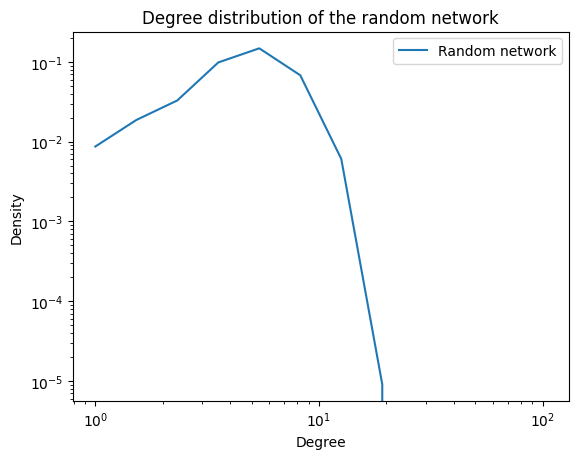

In [195]:
# Compute the distribution of degree for the random network
degree_sequence_rd = [d for _, d in G_rand.degree()]
hist_rd, bins_rd = np.histogram(degree_sequence_rd, bins=np.logspace(0, 2.2, 13), density=True)
make_plot([bins_rd], [hist_rd], 'Degree distribution of the random network', ['Random network'])

> * Compute the distribution of degree for the Computational Social Scientists network using the numpy function ``np.histogram``. Also here, choose bins and normalization strategies wisely, based on the recommendations from previous lectures.

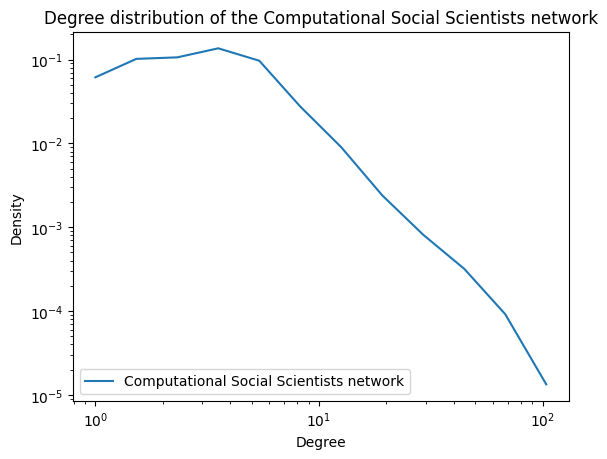

In [196]:
# Compute the distribution of degree for the Computational Social Scientists network
degree_sequence = [d for _, d in G.degree()]
hist_r, bins_r = np.histogram(degree_sequence, bins=np.logspace(0, 2.2, 13), density=True)
make_plot([bins_r], [hist_r], 'Degree distribution of the Computational Social Scientists network', ['Computational Social Scientists network'])

> * Plot both degree distributions on the same figure using line plots, ensuring the x and y axes are scaled in a way that allows for comparison between the two distributions.

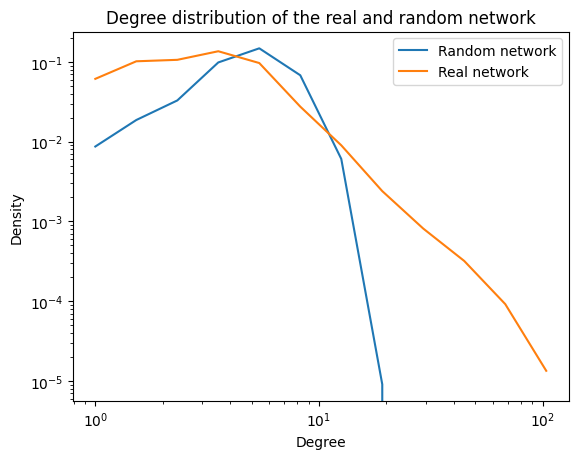

In [197]:
# Plot both degree distributions on the same figure using line plots
make_plot([bins_rd, bins_r], [hist_rd, hist_r], 'Degree distribution of the real and random network', ['Random network', 'Real network'])

> * Add two vertical lines showing the average degree for the random and the real network.

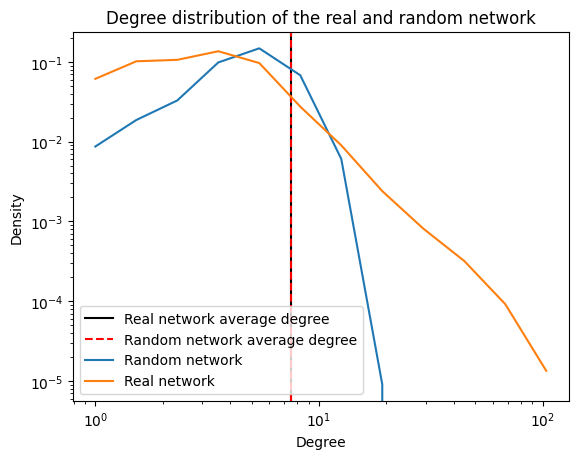

In [198]:
# Add two vertical lines showing the average degree for the random and the real network
plt.axvline(k, color='black', linestyle='-', label='Real network average degree')
plt.axvline(np.mean(degree_sequence_rd), color='red', linestyle='--', label='Random network average degree')
make_plot([bins_rd, bins_r], [hist_rd, hist_r], 'Degree distribution of the real and random network', ['Random network', 'Real network'])

> Answer the following questions __(max 200 words in total)__: 
>   - Does the average degree meaningfully represents the network's characteristics, especially in light of the insights gained from exploring heavy-tailed distributions? Discuss its adequacy or limitations in capturing the essence of the network's structural properties.

The average degree doesn't meaningfully represent the network's characteristics. For a heavy-tail distribution, which is scale invariant, the mean will be greatly affected by the more likely extreme values that in a normal distribution. Thus, the mean is can easily be skewed, whereas the median or mode could be more robust.

>   - What differences can you observe between the real and the random distributions? How does the shape of the degree distribution for each network inform us about the network's properties? (max 150 words)

From the plots of the real and random network, the real network shows to clear follow a power-law distribution in its tail part. For the first part the probability of those small degree values all seems to be equally common, and only as the degree increases the probability also becomes much lower.
The random network behaves quite different from the real network, clearly having a much higher $\alpha$ value, as it drops towards zero much faster than the real network, showing it doesn't have the same number of extreme values that the real network has.
This indicates that though the random network was correctly based on the real network as their average degree perfectly match, the distribution of the degrees has become more spread out in the random network. Analyzing the sequences max-values also show this. The real network has a max value of 144 versus the random’s 21.

### Part 2 Network Analysis in Computational Social Science

These exercises are taken from Week 6. 

> __Exercise 1: Mixing Patterns and Assortativity__ 
>
> __Part 1: Assortativity Coefficient__ 
> 1. *Calculate the Assortativity Coefficient* for the network based on the country of each node. Implement the calculation using the formula provided during the lecture, also available in [this paper](https://arxiv.org/pdf/cond-mat/0209450.pdf) (equation 2, here for directed networks). **Do not use the NetworkX implementation.**


In [201]:
def assortativity(G, attribute):
    # Get number of nodes of attribute i that connect to nodes of attribute j (eg. E_ij, E_ii, E_jj)
    node_attributes = set(nx.get_node_attributes(G, attribute).values())
    E = np.zeros((len(node_attributes), len(node_attributes)))

    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        for neighbor in neighbors:
            i = list(node_attributes).index(G.nodes[node][attribute])
            j = list(node_attributes).index(G.nodes[neighbor][attribute])
            E[i, j] += 1

    # Normalize the matrix
    E = E / np.sum(E)
    
    # The assortativity coefficient
    r = (np.trace(E) - np.sum(E**2)) / (1 - np.sum(E**2))
    
    return r

# Calculate the assortativity of the real network
r = assortativity(G, 'group')

print(f"Assortativity of the real network: {r:.5f}")

Assortativity of the real network: 0.45356



> __Part 2: Configuration model__
> In the following, we are going to assess the significance of the assortativity by comparing the network's assortativity coefficient against that of random networks generated through the configuration model.  
>
> 2. *Implement the configuration model* using the _double edge swap_ algorithm to generate random networks. Ensure each node retains its original degree but with altered connections. Create a function that does that by following these steps:
>   - **a.** Create an exact copy of your original network.
>   - **b.** Select two edges, $e_{1} = (u,v)$ and $e_{2} = (x,y)$, ensuring *u != y* and *v != x*.
>   - **c.** Flip the direction of $e_{1}$ to $e_{1} = (v,u)$ 50% of the time. This ensure that your final results is not biased, in case your edges were sorted (they usually are). 
>   - **d.** Ensure that new edges $e_{1}' = (e_{1}[0],e_{2}[1])$ and $e_{2}' = (e_{2}[0],e_{1}[1])$ do not already exist in the network.
>   - **e.** Remove edges $e_{1}$ and $e_{2}$ and add edges $e_{1}'$ and $e_{2}'$.
>   - **f.** Repeat steps **b** to **e** until you have performed _E*10_ swaps, where E is the total number of edges.

In [202]:
def configuration_model(G: nx.Graph):
    G_copy = G.copy()
    edges = list(G_copy.edges())
    idxs = list(range(len(edges)))
    num_swaps = 10 * G_copy.number_of_edges()

    for _ in range(num_swaps):
        # b. Select two edges
        idx1, idx2 = random.sample(idxs, 2)
        e1, e2 = edges[idx1], edges[idx2]

        # Ensure distinct nodes
        if len(set(e1 + e2)) < 4:
            continue

        # c. Flip the direction of e1 50% of the time
        if random.random() < 0.5:
            e1 = (e1[1], e1[0])

        # Step d: Ensure new edges do not exist
        if e1[0] not in G_copy.neighbors(e2[1]) and e2[0] not in G_copy.neighbors(e1[1]):
            
            # Step e: Remove old edges and add new edges
            G_copy.remove_edges_from([e1, e2])
            G_copy.add_edges_from([(e1[0], e2[1]), (e2[0], e1[1])])
    
            edges[idx1] = (e1[0], e2[1])
            edges[idx2] = (e2[0], e1[1])

    return G_copy

G_config = configuration_model(G)


> 3. *Double check that your algorithm works well*, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.

In [203]:
# Check that the degree of nodes in the original network and the new 'randomized' version of the network are the same
assert all([G.degree(node) == G_config.degree(node) for node in G.nodes])


> __Part 3: Analyzing Assortativity in Random Networks__  
>
> 4. *Generate and analyze at least 100 random networks* using the configuration model. For each, calculate the assortativity with respect to the country and plot the distribution of these values. Compare the results with the assortativity of your original network to determine if connections within the same country are significantly higher than chance.


100%|██████████| 100/100 [15:49<00:00,  9.50s/it]


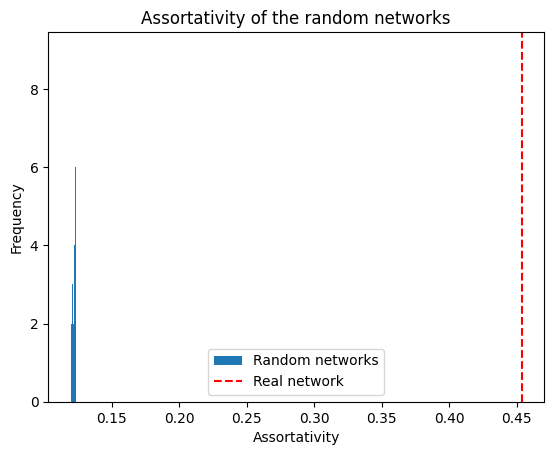

In [21]:
assortativities = []
for _ in tqdm(range(100)):
    G_config = configuration_model(G)
    r_config = assortativity(G_config, 'group')
    assortativities.append(r_config)

# Plot the distribution of the assortativities
plt.hist(assortativities, bins=30, label='Random networks')

# Plot the assortativity of the original network
plt.axvline(r, color='red', linestyle='--', label='Real network')
plt.xlabel('Assortativity')
plt.ylabel('Frequency')
plt.title('Assortativity of the random networks')
plt.legend()
plt.show()

We can see that the connections within happening the same country occur with a larger probability than by chance, as there is a clear difference in the grouping of the random networks and the assortativity value of the real network.

> __Part 4: Assortativity by Degree__
>
> 5. *Calculate degree assortativity* for your network using the formula discussed in the lecture.
> 6. *Compare your network's degree assortativity* against that of 100 random networks generated via the configuration model. Analyze whether your network shows a tendency for high-degree scientists to connect with other high-degree scientists and vice versa.

In [224]:
def degree_assortativity(G):
    # k_u and k_v are the degrees of nodes u and v, respectively
    k_u = []
    k_v = []
    for u, v in G.edges():
        k_u.append(G.degree(u))
        k_v.append(G.degree(v))
    
    for x, y in G.edges():
        k_u.append(G.degree(y))
        k_v.append(G.degree(x))
    
    k_u = np.array(k_u)
    k_v = np.array(k_v)
    r = ((np.mean(k_u * k_v) - np.mean(k_u) * np.mean(k_v)) /
         (np.sqrt(np.mean(k_u**2) - np.mean(k_u)**2) * np.sqrt(np.mean(k_v**2) - np.mean(k_v)**2)))

    return r

r_degree = degree_assortativity(G)

print(f"Degree assortativity of the real network: {r_degree:.5f}")

Degree assortativity of the real network: -0.09479


100%|██████████| 100/100 [21:56<00:00, 13.16s/it]


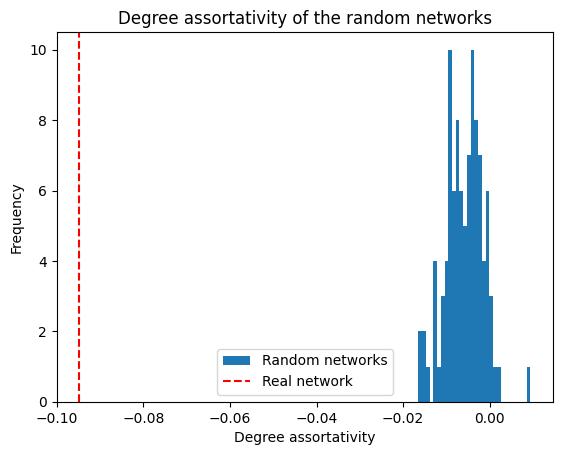

In [24]:
# Compare to random networks
degree_assortativities = []
for _ in tqdm(range(100)):
    G_config = configuration_model(G)
    r_config = degree_assortativity(G_config)
    degree_assortativities.append(r_config)

# Plot the distribution of the degree assortativities
plt.hist(degree_assortativities, bins=30, label='Random networks')

# Plot the degree assortativity of the original network
plt.axvline(r_degree, color='red', linestyle='--', label='Real network')
plt.xlabel('Degree assortativity')
plt.ylabel('Frequency')
plt.title('Degree assortativity of the random networks')
plt.legend()
plt.show()

As the degree assortative value of the real network is below zero, it seems to be a disassortative network. This means that we don't see a high correlation for high degree scientists to connect with other high degree scientists, instead it would suggest the opposite, so high degree to low degree, and this is further supported by the difference in the real and random networks values.

> __Part 5: Reflection questions (max 250 words for the 3 questions)__
> 
> 7. *Assortativity by degree.* Were the results of the degree assortativity in line with your expectations? Why or why not?

Seeing that the degree assortative value of the real network being $-0.09$ was not the expectation. In general, you would expect a social graph to have positive assortativity like the value seen when grouping by the country. However, we have a negative value indicating a disassortative network instead. If the value was positive, high degree scientists would connect with people like them, which makes theoretical sense, as well-received scientists would probably collaborate with other known scientists. In this network the opposite seems to be the case, where high-degree nodes more often connect the low-degree than.

> 8. *Edge flipping.* In the process of implementing the configuration model, you were instructed to flip the edges (e.g., changing *e_1* from (u,v) to (v,u)) 50% of the time. Why do you think this step is included?

Switching the perspective on one of the nodes makes sense, since when retrieving the edge list, we only get each edges listed once. In an undirected graph each edge should theoretically be listed twice, ones from each node’s perspective, so flipping one of the nodes half the time ensures, that we also considered it could be reversed, and thus look at the other two pairs that can be made when edge flipping nodes.

> 9. *Distribution of assortativity in random networks.* Describe the distribution of degree assortativity values you observed for the random networks. Was the distribution pattern expected? Discuss how the nature of random network generation (specifically, the configuration model and edge flipping) might influence this distribution and whether it aligns with theoretical expectations.    

The distribution of the random networks was more in line with expectations. We see that they are all placed close to zero indicating a neutral graph, showing a clear distinction between them and the real network. Implementing model configuration ensures the random networks has with a specific degree distribution. Edge flipping preserves the hubs in the graph, thus only shuffles the structure. These properties help ascertain the conclusion we can draw when then comparing the distribution of random networks to the real.

> **Exercise 2: Central nodes.** Remember to write your answers in the notebook. 
> * Find the 5 most central scientists according to the closeness centrality. What role do you imagine scientists with high closeness centrality play?
> * Find the 5 most central scientists according to eigenvector centrality.

In [25]:
# Find the 5 most central scientists according to closeness centrality.
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print(f'The 5 most central scientists according to closeness centrality are: {sorted_closeness_centrality[:5]}')

# Find the 5 most central scientists according to eigenvector centrality.
eigenvector_centrality = nx.eigenvector_centrality(G)
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)
print(f'The 5 most central scientists according to eigenvector centrality are: {sorted_eigenvector_centrality[:5]}')

The 5 most central scientists according to closeness centrality are: [('https://openalex.org/A5067118505', 0.24680448161590657), ('https://openalex.org/A5034372799', 0.24633246332463324), ('https://openalex.org/A5048877432', 0.24540482381422038), ('https://openalex.org/A5009232244', 0.24477385024705436), ('https://openalex.org/A5021346979', 0.24445684939153733)]
The 5 most central scientists according to eigenvector centrality are: [('https://openalex.org/A5046546654', 0.2022730483142954), ('https://openalex.org/A5031799782', 0.18012291178570392), ('https://openalex.org/A5021346979', 0.16498360107919083), ('https://openalex.org/A5014662127', 0.16423956836216289), ('https://openalex.org/A5039841997', 0.1573203005809487)]


What role do you imagine scientists with high closeness centrality play?

> * Plot the closeness centrality of nodes vs their degree. Is there a correlation between the two? Did you expect that? Why?

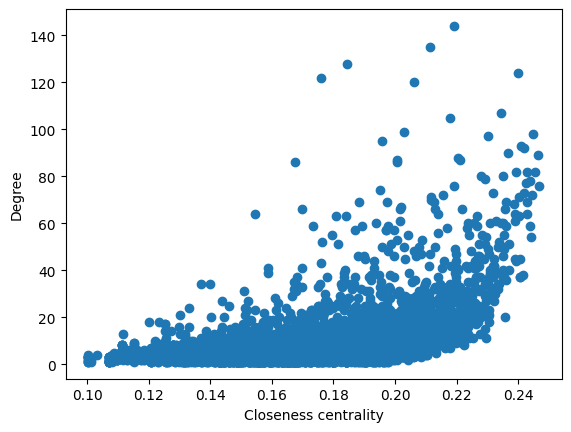

In [26]:
closeness_centrality = nx.closeness_centrality(G)
degree = dict(G.degree())
plt.scatter(list(closeness_centrality.values()), list(degree.values()))
plt.xlabel('Closeness centrality')
plt.ylabel('Degree')
plt.show()

ANSWER: 

> * Repeat the two points above using eigenvector centrality instead. Do you observe any difference? Why?

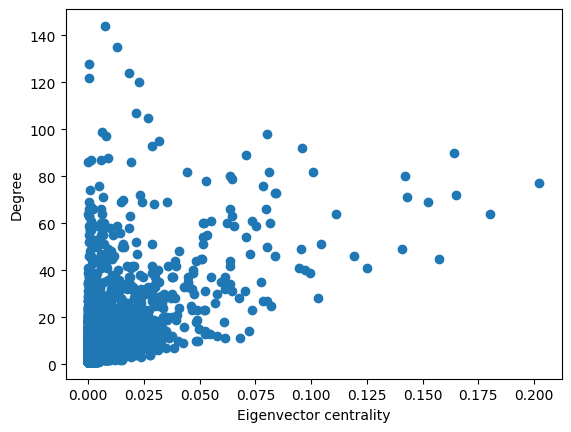

In [27]:
eigenvector_centrality = nx.eigenvector_centrality(G)
degree = dict(G.degree())
plt.scatter(list(eigenvector_centrality.values()), list(degree.values()))
plt.xlabel('Eigenvector centrality')
plt.ylabel('Degree')
plt.show()

ANSWER: 

### Part 3 - Words that characterize Computational Social Science communities

These exercises are taken from Week 8
> __Exercise 1: TF-IDF and the Computational Social Science communities.__ The goal for this exercise is to find the words charachterizing each of the communities of Computational Social Scientists.
> What you need for this exercise: 
>    * The assignment of each author to their network community, and the degree of each author (Week 6, Exercise 4). This can be stored in a dataframe or in two dictionaries, as you prefer.  
>    * the tokenized _abstract_ dataframe (Week 7, Exercise 2)
>
> 1. First, check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). Explain in your own words the point of TF-IDF. 
>   * What does TF stand for?

**TF (Term Frequency)**: This measures the frequency of a term within a document. Essentially, it quantifies how often a particular word appears in a document. It is calculated by dividing the number of times a term appears in a document by the total number of terms in that document. The higher the frequency of a term in a document, the higher its TF score.

>   * What does IDF stand for?

**IDF (Inverse Document Frequency)**: This measures the importance of a term by calculating how rare it is across the entire document corpus. Terms that occur frequently across all documents are given a lower IDF score, while terms that are rare are given a higher IDF score. It is calculated by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient. The idea is that rare terms are more informative and should be weighted more heavily in determining the significance of a term within a document.

> 2. Now, we want to find out which words are important for each *community*, so we're going to create several ***large documents, one for each community***. Each document includes all the tokens of abstracts written by members of a given community. 
>   * Consider a community _c_
>   * Find all the abstracts of papers written by a member of community _c_.
>   * Create a long array that stores all the abstract tokens 
>   * Repeat for all the communities. 
> __Note:__ Here, to ensure your code is efficient, you shall exploit ``pandas`` builtin functions, such as [``groupby.apply``](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html) or [``explode``](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html).

In [5]:
# Load the community_assignments.json file, it is a dictionary with keys as author names and values as community assignments.
community_assignments = pd.read_json('data/author_to_community.json', typ='series')
map_author_to_community = community_assignments.to_dict()

# Load the abstracts
IC2S2_abstracts = pd.read_csv('data/IC2S2_abstracts_tokens.csv')

# Load the papers to get the authors for the works
IC2S2_papers = pd.read_csv('data/IC2S2_papers.csv')

#IC2S2_papers['coauthor_ids'] Contain a list of authors for each paper
# We create a dictionary that maps authors to the papers they have written
author_to_papers = {}
for index, row in IC2S2_papers.iterrows():
    authors = ast.literal_eval(row['coauthor_ids'])
    for author in authors:
        if author in author_to_papers:
            author_to_papers[author].append(row['id'])
        else:
            author_to_papers[author] = [row['id']]

# Then using the dictionary to create a pandas dataframe with the author
# as the index and the papers they have written as a list in the column
# and the community assignment as another column
author_to_papers_df = pd.DataFrame(list(author_to_papers.items()), columns=['author', 'papers'])
author_to_papers_df['community'] = author_to_papers_df['author'].map(map_author_to_community)
author_to_papers_df.dropna(inplace=True, subset=['community'])

# For each community create a long array which store all the abstracts for the papers written by authors in that community
community_to_abstracts = {}
for index, row in author_to_papers_df.iterrows():
    community = row['community']
    papers = row['papers']
    for paper in papers:
        if paper not in IC2S2_abstracts['id'].values:
            continue
        abstract_tokens = ast.literal_eval(IC2S2_abstracts[IC2S2_abstracts['id'] == paper]['tokens'].values[0])
        if community in community_to_abstracts:
            community_to_abstracts[community].append(abstract_tokens)
        else:
            community_to_abstracts[community] = abstract_tokens

> 3. Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within the __top 5 communities__ (by number of authors).

In [6]:
# Find the top communities by number of authors
top_9_communities = author_to_papers_df['community'].value_counts().head(9).index

# Create a dictionary to store the top 10 terms for each top community
top_10_terms = {}

for community in top_9_communities:
    abstracts = community_to_abstracts[community]
    vectorizer = TfidfVectorizer(use_idf=False) # Only calculate term frequency
    X = vectorizer.fit_transform([' '.join(abstract) for abstract in abstracts])
    feature_array = np.array(vectorizer.get_feature_names_out())
    tf_sorting = np.argsort(X.toarray()).flatten()[::-1]
    top_n = feature_array[tf_sorting][:10]
    top_10_terms[community] = top_n

# Only print the top 5 terms for top 5 communities
for community, terms in list(top_10_terms.items())[:5]:
    print(f"Community {community}: {terms[:5]}")

Community 7.0: ['contagion' 'weight' 'heterogen' 'degre' 'social']
Community 8.0: ['structur' 'tree' 'nmt' 'target' 'show']
Community 0.0: ['linear' 'code' 'glycoconjug' 'letter' 'singl']
Community 37.0: ['sentiment' 'compani' 'market' 'movement' 'perform']
Community 12.0: ['interest' 'audienc' 'countri' 'facebook' 'potenti']


>   * Describe similarities and differences between the communities.

There doesn't seem to be much overlap between the different communities. Each community predominantly focuses on a distinct subject.
Considering them one at a time:
- Community 7 seem to have something to do with a social context and analyzing that maybe in the form of a graph.
- Community 8 however appears to be more technical with terms that could correlate to computer science or data structures.
- Community 0 is a bit weirder but might describe some kind of coding within biochemistry.
- Community 37 instead pertains to some finance or business aspects.
- Community 12 lastly looks at some marketing and social media.

>   * Why aren't the TFs not necessarily a good description of the communities?

Term frequency alone might not be a good description of the communities as they would lack a sense of context. It doesn't consider a word can have multiple meanings or semantic variance. Another reason could be that a community could try to encapsulate two topics thus ending up mixing them together.

>   * Next, we calculate IDF for every word.
>   * What base logarithm did you use? Is that important?

The base logarithm used by sklearns tf-idf vectorizer is the natural logarithm. It also applies smoothing on the document count, thus being bit more advanced that standard hand-calculations. Whether using the natural logarithm or base-10 can have a slight impact on the values calculated in idf, but as long at we are consistent with the implementation, it should come out to, or at least very close to, the same end result.

In [7]:
# Create a dictionary to store the top 10 terms for each community
top_10_tfidf = {}

for community in top_9_communities:
    abstracts = community_to_abstracts[community]
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform([' '.join(abstract) for abstract in abstracts])
    feature_array = np.array(vectorizer.get_feature_names_out())
    tfidf_sorting = np.argsort(X.toarray()).flatten()[::-1]
    top_n = feature_array[tfidf_sorting][:10]
    top_10_tfidf[community] = top_n

> 4. We're ready to calculate TF-IDF. Do that for the __top 9 communities__ (by number of authors). Then for each community: 
>   * List the 10 top TF words 
>   * List the 10 top TF-IDF words
>   * List the top 3 authors (by degree)
>   * Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?

In [8]:
# Find the top 3 authors by degree
# Search for the authors by communities in the graph
top_3_authors = {}
for community in top_9_communities:
    authors = [author for author in author_to_papers_df[author_to_papers_df['community'] == community]['author']]
    subgraph = G.subgraph(authors)
    degrees = dict(subgraph.degree())
    top_3_authors[community] = sorted(degrees, key=degrees.get, reverse=True)[:3]

for community in top_9_communities:
    print(f'Community {community}')
    print(f'Top 10 TF words: {top_10_terms[community]}')
    print(f'Top 10 TF-IDF words: {top_10_tfidf[community]}')
    print(f'Top 3 authors by degree: {top_3_authors[community]}')
    print('\n')

Community 7.0
Top 10 TF words: ['contagion' 'weight' 'heterogen' 'degre' 'social' 'network' 'approach'
 'hamper' 'enhanc' 'edgeweight']
Top 10 TF-IDF words: ['contagion' 'weight' 'heterogen' 'degre' 'edgeweight' 'discontinu'
 'hamper' 'compartment' 'skew' 'alter']
Top 3 authors by degree: ['https://openalex.org/A5016268748', 'https://openalex.org/A5044033087', 'https://openalex.org/A5065692438']


Community 8.0
Top 10 TF words: ['structur' 'tree' 'nmt' 'target' 'show' 'experi' 'specif' 'translat'
 'question' 'formal']
Top 10 TF-IDF words: ['tree' 'nmt' 'structur' 'target' 'translat' 'specif' 'experi' 'topolog'
 'surpris' 'linguisticallyinspir']
Top 3 authors by degree: ['https://openalex.org/A5087088138', 'https://openalex.org/A5045037642', 'https://openalex.org/A5068508539']


Community 0.0
Top 10 TF words: ['linear' 'code' 'glycoconjug' 'letter' 'singl' 'repres' 'account' 'use'
 'protein' 'canon']
Top 10 TF-IDF words: ['code' 'linear' 'glycoconjug' 'letter' 'singl' 'repres' 'molecul'

ANSWERS: 

 __Exercise 2: The Wordcloud__. It's time to visualize our results!

> * Install the [`WordCloud`](https://pypi.org/project/wordcloud/) module. 
> * Now, create word-cloud for each community. Feel free to make it as fancy or non-fancy as you like.
> * Make sure that, together with the word cloud, you print the names of the top three authors in each community (see my plot above for inspiration). 
> * Comment on your results. What can you conclude on the different sub-communities in Computational Social Science? 
> * Look up online the top author in each community. In light of your search, do your results make sense?

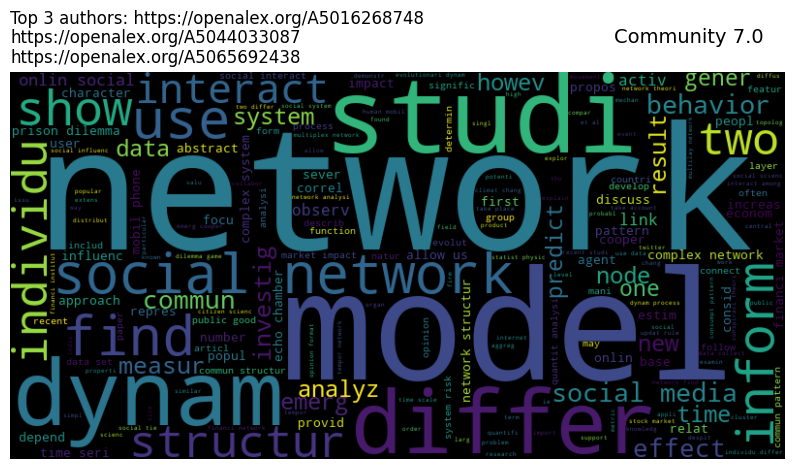

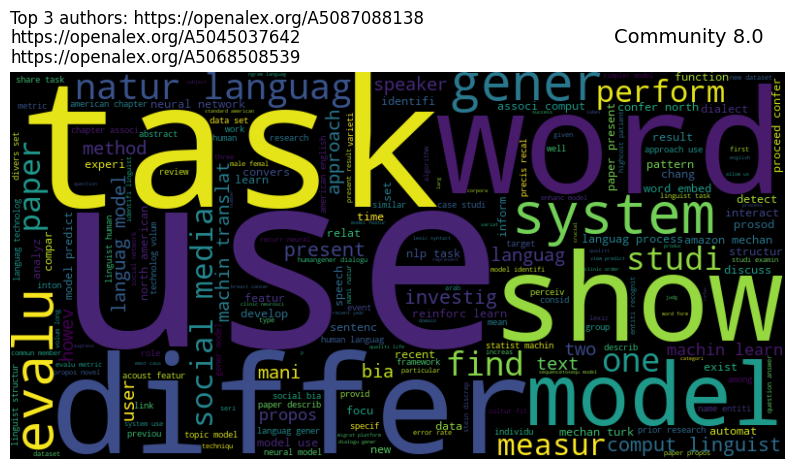

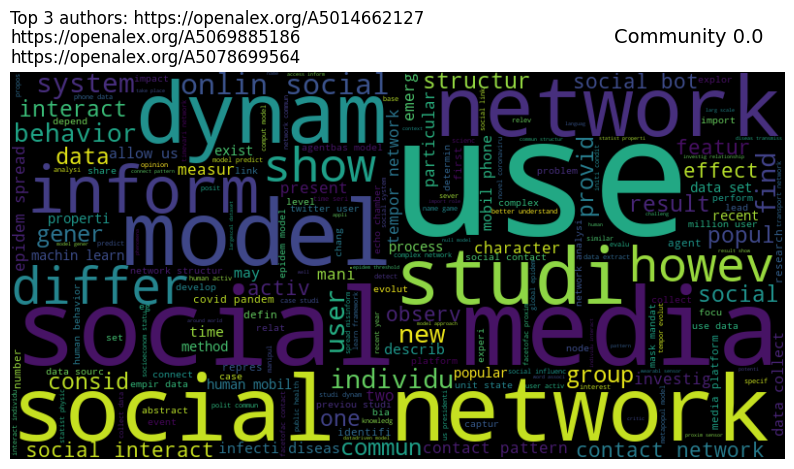

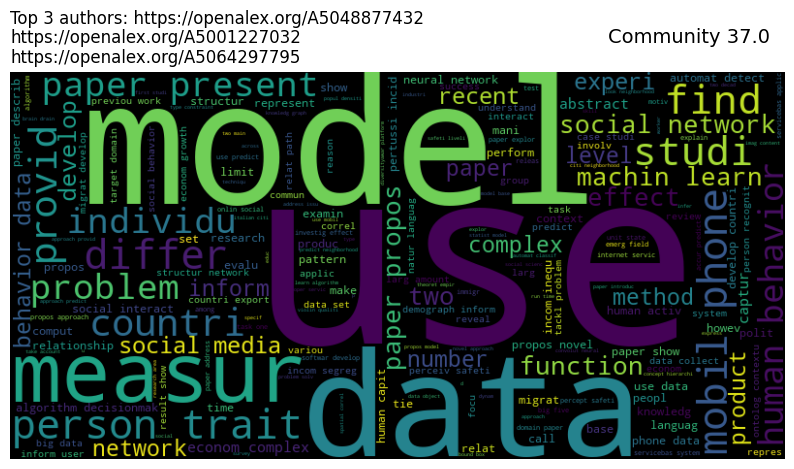

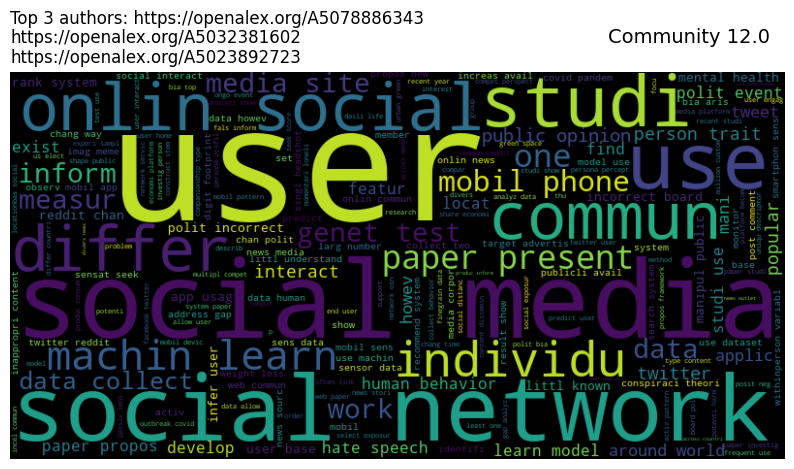

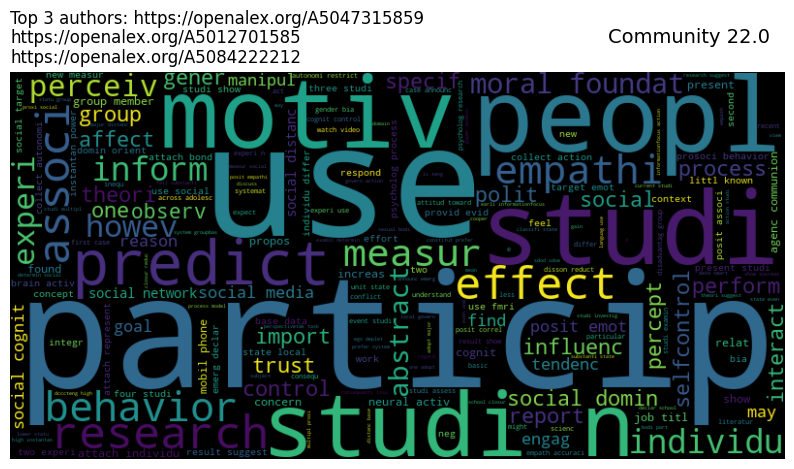

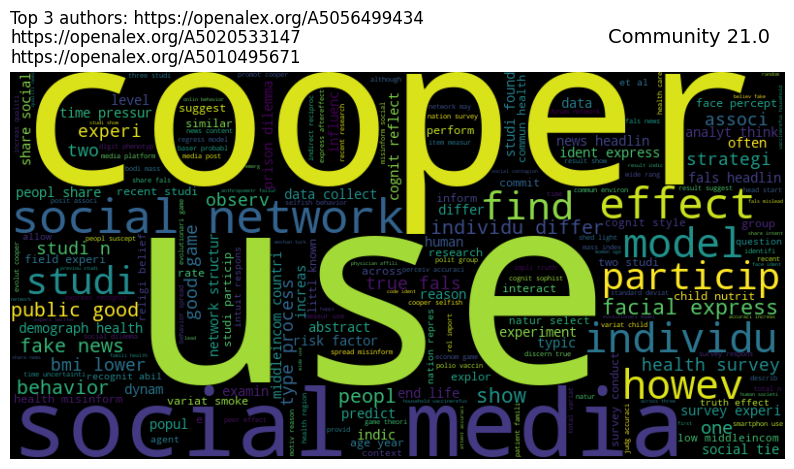

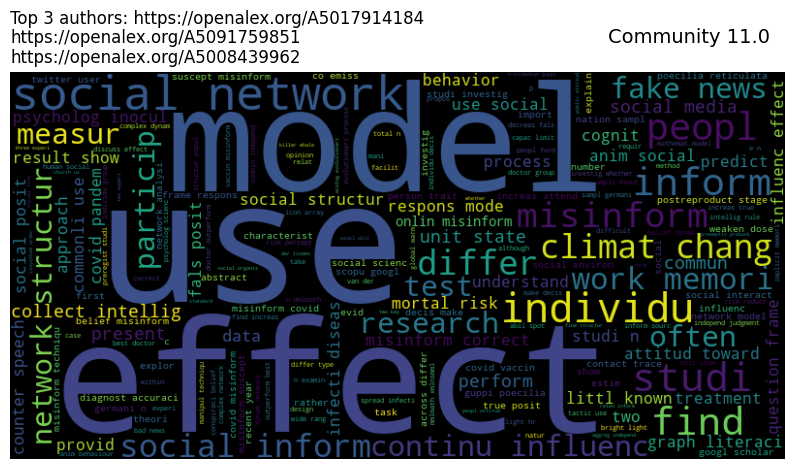

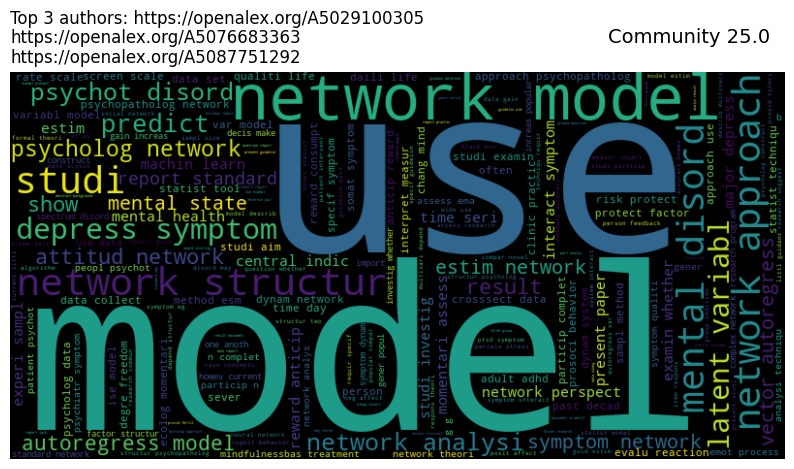

In [18]:
# For each community create a wordcloud of the abstracts for the papers written by authors in that community

for community in top_9_communities:
    abstracts = community_to_abstracts[community]
    text = ' '.join([' '.join(abstract) for abstract in abstracts])
    top_authors = top_3_authors[community]
    
    wc = wordcloud.WordCloud(width=800, height=400).generate(text)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.text(700, -30, f'Community {community}', fontsize=14, color='black', ha='center')
    
    plt.text(0, -50, f'Top 3 authors: {top_authors[0]}', fontsize=12, color='black', zorder=1)
    plt.text(0, -30, f'{top_authors[1]}', fontsize=12, color='black', zorder=1)
    plt.text(0, -10, f'{top_authors[2]}', fontsize=12, color='black', zorder=1)
    
    plt.show()

Answers:

Alot of the communities have 'use' and 'model' in commmon. This makes sense as these words are expected to be common across the subcommunities in computational social science. In Community 7 two of the top 3 authors have the topic 'Statistical Mechanics of Complex Networks' as their most published topic. While in Community 25 the three top authors all have the topic 'Network Analysis of Psychopathology and Mental Disorders' as their most published topic. This makes sense as Community 25 has words like 'mental', 'disord' (stemmed), 'depress' and 'psychot' in their word cloud. So while Community 7 and 25 have alot of the same words there are still underlying differences in the topics of the communities. This is the case across all the communities.

 __Exercise 3: Computational Social Science__ 

> * Go back to Week 1, Exercise 1. Revise what you wrote on the topics in Computational Social Science. 
> * In light of your data-driven analysis, has your understanding of the field changed? How? __(max 150 words)__